# artist-genre-evolution
This notebook is submitted as a prerequisite of CSMODEL and uses the [Spotify Music Dataset](https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset) from Kaggle.

Our main goal is to answer the following research question:
### **"Do artists in certain music genres exhibit more change in their musical features over time than others?"**

ie: Does the genre an artist is in affect how much they *change* or *evolve* in terms of their musical features (danceability, energy, acousticness).



## About the Dataset
__________

This project utilizes the "High Popularity Songs" portion of the Spotify Music Dataset, sourced from Kaggle. This dataset is a curated collection of songs from Spotify that are considered popular, specifically those **with a popularity score greater than 68.** 

For each song, the dataset provides a rich set of attributes, including quantitative audio features derived from Spotify's audio analysis (e.g., `danceability`, `energy`, `valence`) and descriptive metadata (e.g., `track_name`, `track_artist`, `release_date`).

## Data Collection & Potential Implications


The dataset was collated by querying the official Spotify Web API using custom Python scripts. The data for each track, including its audio features, is what Spotify provides directly to developers.

The method of collection has several key implications for our analysis:
-  **Popularity Bias**: The dataset is intentionally filtered to include only songs with a popularity score above 68. This means our insights will be specific to commercially successful music on the platform and cannot be generalized to all music or to less popular/niche genres. The factors driving popularity on Spotify (e.g., playlist placement, marketing, platform promotion) are complex and may introduce a bias towards mainstream music.
(following this, Some artists' primary genres may not reflect their actual style, but rather playlist marketing patterns.)

While there is a low_popularity_songs dataset, the researchers agreed not to use it because the primary research question requires analyzing an artist's musical evolution over time. **High-popularity artists are more likely to have extensive discographies with multiple release dates, providing sufficient data for analysis.** Conversely, low-popularity artists often have too few songs in the dataset to establish a meaningful timeline of change

- **Standardized Metrics**: Since the audio features (energy, liveness, etc.) are calculated by Spotify's proprietary algorithms, they represent a consistent and standardized measurement system. However, these metrics are unknown to the  researchers - and we must rely on Spotify's definitions for their interpretation.

- **Temporal Relevance**: The dataset represents a snapshot in time. Song popularity is highly dynamic, and the trends identified may be specific to the period in which the data was collected.

- **Playlist-Based Genre**: The `playlist_genre` and `playlist_subgenre` fields are derived from the playlists the songs appeared in, not from an official artist-level genre tag. An artist's songs may appear in playlists of various genres (e.g., a rock song in a "Workout" playlist categorized under Pop). This means our genre groupings are an approximation and could introduce noise into the analysis.



## Structure 


The data is presented in a tabular format within the `high_popularity_spotify_data.csv` file.
- Rows: Each row represents a single, unique song (track).
- Columns: Each column represents a specific attribute or feature of that song.
- Observations: The dataset contains 1686 observations (songs) and 28 features (columns).



## Attributes 



The 28 features can be broadly categorized into Audio Features and Descriptive Features.

**Audio Features**

These are quantitative features generated by Spotify's analysis of a track's audio.

- `energy`: A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `tempo`: The speed of a track, measured in beats per minute (BPM).

- `danceability`: A score describing how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity.

- `loudness`: The overall loudness of a track in decibels (dB).

- `liveness`: The likelihood of a track being a live recording. Higher values suggest the presence of an audience.

- `valence`: The musical positiveness (emotion) of a track. High valence sounds happy; low valence sounds sad or angry.

- `speechiness`: Measures the presence of spoken words in a track.

- `instrumentalness`: The likelihood a track contains no vocals. Values near 1.0 suggest purely instrumental tracks.

- `mode`: Indicates the modality (major or minor) of the track.

- `key`: The musical key, represented as an integer (0 - 11) mapping to Pitch Class notation.

- `duration_ms`: The length of the track in milliseconds.

- `acousticness`: A confidence measure of whether a track is acoustic.

**Descriptive Features**

These are metadata attributes that describe the track and its context.

- `track_name`: The name of the song.

- `track_artist`: The artist(s) who performed the song.

- `track_album_name`: The album the song belongs to.

- `track_album_release_date`: The release date of the album.

- `track_popularity`: A score (0 - 100) calculated by Spotify based on the total number of streams and how recent they are.

- `playlist_name`: The name of the playlist the track was sourced from.

- `playlist_genre:` The main genre associated with the source playlist.

- `playlist_subgenre`: A more specific subgenre of the source playlist.

- `track_id`: A unique identifier for the track, assigned by Spotify.

- `track_album_id`: A unique identifier for the album.

- `playlist_id`: A unique identifier for the source playlist.

## Data Cleaning and Pre-Processing

Before proceeding with our analysis, it is crucial to clean and preprocess the raw data to ensure accuracy, consistency, and suitability for our research question. 

This section details the steps taken to prepare the `high_popularity_spotify_data.csv` dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler


high_df = pd.read_csv('high_popularity_spotify_data.csv')
high_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [3]:
high_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

### Standardizing Categorical Text

To ensure consistency and prevent different representations of the same category, we convert string-based categorical columns like `playlist_genre` and `track_artist` to lowercase and remove leading/trailing whitespace. 


In [4]:
# This makes sure that the 'playlist_genre' and 'track_artist' columns are in lowercase and that there are no duplicates.
high_df['playlist_genre'] = high_df['playlist_genre'].str.lower().str.strip()
high_df['track_artist'] = high_df['track_artist'].str.lower().str.strip()

### Handling Missing Values
We first inspect the dataset for any missing values.

In [5]:
# Check for any null values
high_df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

The output above indicates one missing value in the `track_album_name` column. Given that this its entirely unrelated to our research topic, we will simply sub in the missing name with "unknown album"

In [6]:

# Fill missing album names with 'Unknown Album'
high_df['track_album_name'] = high_df['track_album_name'].fillna('Unknown Album')


### Managing Duplicate Song Entries from Playlists

The dataset is compiled from various Spotify playlists. This can lead to the same `track_id` (representing a unique song) appearing multiple times if it's featured in different playlists. 

While not true duplicates in terms of unique (`track_id`, `playlist_id`) pairs, this can introduce complexities when analyzing unique song properties or artist-genre relationships if a song is associated with multiple genres.

We first check for exact duplicates across `playlist_genre`, `id` (track_id), and `playlist_subgenre`:

In [7]:
# Check for any duplicate rows that may interfere with the EDA
high_df.duplicated(subset=['playlist_genre', 'id', 'playlist_subgenre']).any()

False

This indicates that no song appears in the exact same playlist genre and subgenre combination more than once. However, a song can appear in different playlist genres or subgenres. Let's inspect if there are duplicates with the same `track_id` and `playlist_genre`:

In [8]:
# Check for any duplicate rows that may interfere with the EDA
high_df.duplicated(subset=['playlist_genre', 'id']).any()

True

Now that there are duplicates found, let's inspect where `track_id` and `playlist_genre` are duplicated:

In [9]:
high_df[high_df.duplicated(subset=['playlist_genre', 'id'])]

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
180,0.472,101.061,0.898,hip-hop,-7.001,0.141,0.2140,kendrick lamar,4,0.0776,...,0.000000,5JjnoGJyOxfSZUZtk2rRwZ,1,1,274192,0.01070,6AI3ezQ4o3HUoP6Dhudph3,gangster,audio_features,6mODZNt8CYYEBrWAyS5vs4
182,0.552,144.941,0.640,hip-hop,-5.679,0.119,0.1120,"future, metro boomin, travis scott, playboi carti",4,0.1290,...,0.000000,4iqbFIdGOTzXeDtt9owjQn,1,2,228267,0.02150,28drn6tQo95MRvO0jQEo5C,gangster,audio_features,6mODZNt8CYYEBrWAyS5vs4
220,0.434,150.062,0.833,hip-hop,-8.795,0.165,0.2810,future,4,0.4310,...,0.021900,17FBoXK1NU2rvJBbzdzw0r,1,2,204600,0.01020,0VgkVdmE4gld66l8iyGjgx,trap,audio_features,37i9dQZF1EIhshGKK0SEkb
226,0.413,131.964,0.772,hip-hop,-8.194,0.111,0.2110,chief keef,4,0.0891,...,0.000000,2B4y3j02ho6XNF8BEzx3JF,0,0,246213,0.03610,01Lr5YepbgjXAWR9iOEyH1,trap,audio_features,37i9dQZF1EIhshGKK0SEkb
248,0.583,116.624,0.709,hip-hop,-5.298,0.195,0.5330,"metro boomin, future, chris brown",4,0.2040,...,0.000003,7txGsnDSqVMoRl6RQ9XyZP,0,5,182667,0.13800,0vjeOZ3Ft5jvAi9SBFJm1j,trap,audio_features,37i9dQZF1EIhshGKK0SEkb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,0.507,130.007,0.872,hip-hop,-6.323,0.111,0.5060,gunna,4,0.0720,...,0.000000,5HoNV9xqGbGufrIFH271dR,0,4,158667,0.19500,2EKL77lwxvo615Ga7VjEUl,melodic,audio_features,37i9dQZF1EIgLJJI0PCAq9
1599,0.661,76.710,0.836,reggae,-6.502,0.449,0.7530,damian marley,4,0.3380,...,0.000000,4Y0PrDckfFKxKaVXsscDLB,0,7,213200,0.02080,22AbXxQbMdVqEz7xJjhccG,fusion,audio_features,37i9dQZF1EIeAKlEStQOxi
1601,0.787,119.996,0.704,electronic,-6.751,0.159,0.3100,"hugel, topic, arash, daecolm",4,0.0462,...,0.005380,5MrdEMJrBnauBJsd1nYY00,0,11,214000,0.00926,5nPbKG04fhLkIAjcPFaZq7,afro house,audio_features,487jKTFqWhs6b0AEUz0WpX
1609,0.637,120.033,0.847,electronic,-8.751,0.121,0.0509,"zerb, sofiya nzau",4,0.0587,...,0.201000,5asqLE8StjaHpMWSyjzo2D,0,7,208135,0.20100,5KTZgG84bKFGm53lhLtTqc,afro house,audio_features,487jKTFqWhs6b0AEUz0WpX


As observed in the output above, a song (identified by id) can indeed appear multiple times if it's associated with different `playlist_genre` entries (e.g., a song appearing in a 'pop' playlist and a 'gaming' playlist). This highlights the "Playlist-Based Genre" limitation discussed in the data collection section. 

While the Playlist's main genres are fine to keep, we believe that the best course of action is to remove the subgenres, as we want to focus on the main genres at hand.

In [10]:
# Remove column: playlist_subgenre from the dataset
high_df = high_df.drop(columns=['playlist_subgenre'])

We can now check if there are still duplicates that need to be dropped, this time checking `playlist_name` as well to see if it may cause a lack of duplicates as well.

In [11]:
# Check for any duplicate rows that may interfere with the EDA
high_df.duplicated(subset=['playlist_genre', 'id', 'playlist_name']).any()

False

Again, though the Playlist's main genres are fine to keep, the best course of action to get rid of possible duplicates is to remove the playlist names, as we are to focus solely on the genres for our EDA.

In [12]:
high_df = high_df.drop(columns=['playlist_name'])
high_df.duplicated().any()

True

We can inspect from here which tracks are duplicated

In [13]:
high_df[high_df.duplicated()]


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,type,playlist_id
1113,0.836,105.173,0.543,metal,-9.110,0.1530,0.560,metallica,4,0.0353,...,1986-03-03,0.431000,2Lq2qX3hYhiuPckC8Flj21,0,4,515387,0.000647,2MuWTIM3b0YEAskbeeFE1i,audio_features,37i9dQZF1DWWOaP4H0w5b0
1114,0.908,159.756,0.285,metal,-4.601,0.3110,0.669,iron maiden,4,0.0705,...,1983,0.009090,7I9Wh2IgvI3Nnr8Z1ZSWby,0,4,252733,0.031800,4OROzZUy6gOWN4UGQVaZMF,audio_features,37i9dQZF1DWWOaP4H0w5b0
1115,0.704,118.242,0.430,metal,-8.008,0.0933,0.703,pantera,4,0.0804,...,1992-02-21,0.002210,7kW0cpKgSVsEqcc8xgbSb0,0,1,315120,0.000155,7fcfNW0XxTWlwVlftzfDOR,audio_features,37i9dQZF1DWWOaP4H0w5b0
1116,0.934,127.066,0.417,metal,-3.908,0.1320,0.287,system of a down,4,0.1190,...,2001-09-04,0.001500,6jWde94ln40epKIQCd8XUh,0,7,210240,0.000278,2DlHlPMa4M17kufBvI2lEN,audio_features,37i9dQZF1DWWOaP4H0w5b0
1117,0.891,92.049,0.283,metal,-8.165,0.1590,0.226,korn,4,0.1780,...,1994-10-11,0.003800,7D3XFJlfZIkmGWqZXm2X8z,1,2,258267,0.006780,1pr9TZGOXeJUggIal1Wq3R,audio_features,37i9dQZF1DWWOaP4H0w5b0
1118,0.695,102.178,0.437,metal,-9.447,0.1240,0.413,metallica,3,0.0617,...,1988-08-25,0.085700,6Eycw3dwcDMEFSqkUvLQ7g,1,7,447440,0.001110,5IX4TbIR5mMHGE4wiWwKW0,audio_features,37i9dQZF1DWWOaP4H0w5b0
1119,0.763,148.366,0.365,metal,-9.450,0.0865,0.342,danzig,4,0.0591,...,1988-01-01,0.000457,3elIDlrTtrgKfbxYVgp3uW,0,11,204867,0.007260,7txxAtOMwLLnQTpKeBL6bp,audio_features,37i9dQZF1DWWOaP4H0w5b0
1120,0.908,114.816,0.415,metal,-9.701,0.0820,0.437,pantera,4,0.0765,...,1990-07-20,0.034500,5szY4sBOSD6IFjFN1RtWTe,1,2,243533,0.004370,2SgbR6ttzoNlCRGQOKjrop,audio_features,37i9dQZF1DWWOaP4H0w5b0
1121,0.982,143.772,0.354,metal,-3.026,0.2040,0.194,slipknot,4,0.1680,...,2004,0.000294,4ZDBQSIDIZRUBOG2OHcN3T,0,4,252613,0.000237,61mWefnWQOLf90gepjOCb3,audio_features,37i9dQZF1DWWOaP4H0w5b0
1122,0.828,123.257,0.577,metal,-8.691,0.0581,0.604,metallica,4,0.0298,...,1991-08-12,0.011400,2Kh43m04B1UkVcpcRa1Zug,0,6,331267,0.002130,5sICkBXVmaCQk5aISGR3x1,audio_features,37i9dQZF1DWWOaP4H0w5b0


We can then drop those duplicated tracks from the dataset.

In [14]:
high_df = high_df.drop_duplicates()

### Expanding Collaborating Artists
To ensure all contributing artists are accounted for in our analysis of musical evolution, we separate artists listed in `track_artist` (which may contain multiple artists separated by ', ') into individual entries. This helps us track each artist’s evolution more accurately.


In [15]:
high_df['track_artist'] = high_df['track_artist'].str.split(', ')
high_df_cleaned = high_df.explode('track_artist')
high_df_cleaned = high_df_cleaned.reset_index(drop=True)


We can see how collaboration tracks are now correctly attributed to each individual artist.

Below is an example with Bruno Mars' Die with a Smile, which is a collaboration with Lady Gaga.

In [16]:
high_df_cleaned[high_df_cleaned['track_name'] == 'Die With A Smile'][['track_name', 'track_artist']]

#yes its supposed to be like that, with each song having multiple genres, the song may appear multiple times (this will be used in the next step)

,track_name,track_artist
0,Die With A Smile,lady gaga
1,Die With A Smile,bruno mars
725,Die With A Smile,lady gaga
726,Die With A Smile,bruno mars
1048,Die With A Smile,lady gaga
1049,Die With A Smile,bruno mars


Because songs can appear in playlists with different genres, we assign each artist a `primary genre` based on the most frequent genre linked to their songs. This simplifies genre-based analysis and avoids conflicts caused by playlist-based tagging.


In [17]:
# Group by artist and count genre occurrences for each artist
artist_genre_counts = high_df_cleaned.groupby(['track_artist', 'playlist_genre']).size().reset_index(name='count')

# Find the most frequent genre for each artist
primary_artist_genres = artist_genre_counts.loc[artist_genre_counts.groupby('track_artist')['count'].idxmax()]
primary_artist_genres = primary_artist_genres[['track_artist', 'playlist_genre']].rename(columns={'playlist_genre': 'primary_genre'})

# Merge this back to the cleaned DataFrame
high_df_cleaned = pd.merge(high_df_cleaned, primary_artist_genres, on='track_artist', how='left')

# Display a few examples to verify
print("Example of artist with their assigned primary genre:")
print(high_df_cleaned[['track_artist', 'primary_genre', 'playlist_genre']].head())

#added this to ensure that each track_id is unique, as we will be using it for further analysis
high_df_unique_songs = high_df_cleaned.drop_duplicates(subset=['track_id']).copy()

Example of artist with their assigned primary genre:
        track_artist primary_genre playlist_genre
0          lady gaga           pop            pop
1         bruno mars           pop            pop
2      billie eilish           pop            pop
3      gracie abrams           pop            pop
4  sabrina carpenter           pop            pop


### Addressing Numerical Feature Outliers

To reduce the impact of extreme values, we applied capping [(Winsorization)](https://www.blog.trainindata.com/winsorization-handling-outliers-in-machine-learning/) to the numerical features using the Interquartile Range (IQR) method.
For each feature, values below the lower bound (Q1 − 1.5 × IQR) or above the upper bound (Q3 + 1.5 × IQR) were clipped to those bounds. This approach helps maintain data integrity while minimizing skew from outliers, especially in features like `tempo`, `loudness`, and `duration_ms`.

Why IQR? It’s robust and doesn’t assume a normal distribution, which works well for musical data where outliers (e.g., very short or long songs) can distort averages.


In [18]:
from scipy.stats import zscore

# List of numerical features to treat for outliers
numerical_features_for_outliers = [
    'energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
    'speechiness', 'instrumentalness', 'duration_ms', 'acousticness', 'track_popularity'
]



for col in numerical_features_for_outliers:
    Q1 = high_df_unique_songs[col].quantile(0.25)
    Q3 = high_df_unique_songs[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the IQR bounds
    high_df_unique_songs[col] = high_df_unique_songs[col].clip(lower=lower_bound, upper=upper_bound)

### Type Conversions and Feature Definition
To facilitate numerical analysis and proper handling of categorical variables, we perform several type conversions. The `track_album_release_date` is converted to _datetime_ objects to extract year, month, and day, which are crucial for analyzing temporal evolution.

We also define lists of numerical and categorical features for potential future use

In [19]:


# In `high_df_unique_songs` (or whatever your main DataFrame is after duplicate handling)
high_df_unique_songs['track_album_release_date'] = pd.to_datetime(high_df_unique_songs['track_album_release_date'], errors='coerce')

# Drop any rows where date conversion failed (if any)
high_df_unique_songs.dropna(subset=['track_album_release_date'], inplace=True)

# Check for future dates 
current_date = pd.Timestamp.now() # Get current time 
future_songs = high_df_unique_songs[high_df_unique_songs['track_album_release_date'] > current_date]
if not future_songs.empty:
    print(f"Removing {len(future_songs)} songs with future release dates.")
    high_df_unique_songs = high_df_unique_songs[high_df_unique_songs['track_album_release_date'] <= current_date].copy()

# Check for extremely old dates (we use 1900 as a cutoff)
old_songs = high_df_unique_songs[high_df_unique_songs['track_album_release_date'] < pd.Timestamp('1900-01-01')]
if not old_songs.empty:
    print(f"Removing {len(old_songs)} songs with release dates before 1900.")
    high_df_unique_songs = high_df_unique_songs[high_df_unique_songs['track_album_release_date'] >= pd.Timestamp('1900-01-01')].copy()

# Re-extract year/month/day after cleaning dates
high_df_unique_songs['Release Year'] = high_df_unique_songs['track_album_release_date'].dt.year
high_df_unique_songs['Release Month'] = high_df_unique_songs['track_album_release_date'].dt.month
high_df_unique_songs['Release Day'] = high_df_unique_songs['track_album_release_date'].dt.day


# numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
# categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
# maybe use later

### Filtering Artists 
To meaningfully analyze how artists change over time, we filtered to include only those with:
- At least 3 songs
- At least a 2-year span between first and last release

This ensures we’re evaluating actual evolution, not noise from limited or short-term data.

In [20]:
# Define minimum songs and minimum distinct release years
min_songs_per_artist = 3
min_years_span_per_artist = 2

# Calculate metrics per artist using the unique songs dataframe
artist_song_counts = high_df_unique_songs.groupby('track_artist').size()
artist_min_release_date = high_df_unique_songs.groupby('track_artist')['track_album_release_date'].min()
artist_max_release_date = high_df_unique_songs.groupby('track_artist')['track_album_release_date'].max()
artist_date_span = (artist_max_release_date - artist_min_release_date).dt.days / 365.25 # Span in years, accounting for leap years heeheeheehaw

# Identify artists that meet the criteria
eligible_artists = artist_song_counts[artist_song_counts >= min_songs_per_artist].index
eligible_artists_by_span = artist_date_span[artist_date_span >= min_years_span_per_artist].index

# Get final list of eligible artists
final_eligible_artists = list(set(eligible_artists) & set(eligible_artists_by_span))

# Filter the DataFrame to include only eligible artists
high_df_final_for_analysis = high_df_unique_songs[high_df_unique_songs['track_artist'].isin(final_eligible_artists)].copy()

print(f"Original unique artists (before filtering for evolution): {high_df_unique_songs['track_artist'].nunique()}")
print(f"Artists retained after filtering for min songs ({min_songs_per_artist}) and min years span ({min_years_span_per_artist}): {high_df_final_for_analysis['track_artist'].nunique()}")

# use `high_df_final_for_analysis` for the EDA plots and final analysis.


Original unique artists (before filtering for evolution): 760
Artists retained after filtering for min songs (3) and min years span (2): 96


### Quantifying Musical Change
To mathematically define and measure an artist's "musical change" over time, we employ the **Euclidean Distance**. This metric serves as our dependent variable, providing a quantifiable score for the extent of an artist's musical evolution.


#### What is Euclidean Distance?
Euclidean distance is a common distance metric that calculates the straight-line distance between two points in a multi-dimensional space. If we consider an artist's musical features at a given point in time as a "point" (or vector) in a feature space (e.g., danceability, energy, acousticness), the Euclidean distance measures how far that musical profile has moved from one time period to another.

The formula for Euclidean distance between two points $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$ in $n$-dimensional space is given by:

$$ d(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$



The resulting `musical_change_score` represents the average magnitude of year-over-year musical evolution for each artist, allowing us to compare how much artists in different genres change over time.





In [21]:
# Define the musical features to use for distance calculation

musical_features = [
    'danceability', 'energy', 'acousticness', 'valence',
    'tempo', 'instrumentalness', 'liveness', 'speechiness', 'loudness'
]
scaler = StandardScaler()
high_df_final_for_analysis[musical_features] = scaler.fit_transform(high_df_final_for_analysis[musical_features]) # Standardizing the musical features since they are on different scales

# Ensure 'Release Year' is available 
high_df_final_for_analysis['Release Year'] = high_df_final_for_analysis['track_album_release_date'].dt.year

# Calculate musical change score for each artist
artist_change_scores = {}

for artist in high_df_final_for_analysis['track_artist'].unique():
    artist_df = high_df_final_for_analysis[high_df_final_for_analysis['track_artist'] == artist].sort_values('Release Year')

    # Group by year and calculate mean features for each year
    yearly_avg_features = artist_df.groupby('Release Year')[musical_features].mean()

    # Calculate pairwise Euclidean distances between consecutive years
    distances = []
    for i in range(1, len(yearly_avg_features)):
        vec1 = yearly_avg_features.iloc[i-1].values
        vec2 = yearly_avg_features.iloc[i].values
        distance = np.linalg.norm(vec1 - vec2) # Euclidean distance
        distances.append(distance)

    # Average these distances to get a single change score for the artist
    if distances: # Ensure there are distances to average (artist has more than one year of data)
        artist_change_scores[artist] = np.mean(distances)
    else:
        artist_change_scores[artist] = 0 # No change if only one year of data or less

# Convert to a DataFrame
musical_change_df = pd.DataFrame.from_dict(artist_change_scores, orient='index', columns=['musical_change_score'])
musical_change_df.index.name = 'track_artist'

# Merge with artist's primary genre
musical_change_df = pd.merge(musical_change_df, primary_artist_genres, on='track_artist', how='left')

print(musical_change_df.head())


        track_artist  musical_change_score primary_genre
0          lady gaga              2.377277           pop
1      billie eilish              3.483589           pop
2      gracie abrams              2.125910           pop
3  sabrina carpenter              1.327130           pop
4         the weeknd              4.597374           pop


We store each artist's change score and primary genre in `musical_change_df`. This is our main dataset for comparing how much artists from different genres evolve.


## Exploratory Data Analysis

Our EDA focuses on:
- How many artists per genre are in our final analysis?
- What overall musical change is found among all artists?
- Are there visual trends in musical feature evolution between different artists and genres?

These questions help us connect raw data to our research question about genre-linked musical change.


### 1. What is the distribution of `Musical Change` scores across all artists?

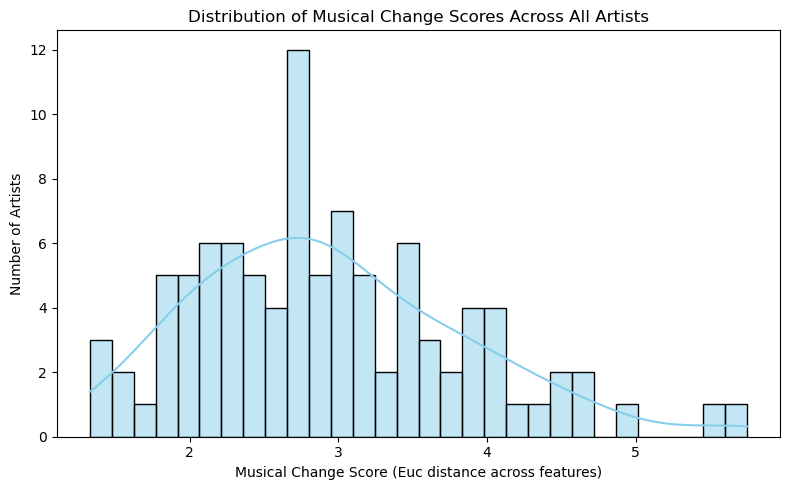

In [22]:
# Plot histogram of musical change scores across all artists
plt.figure(figsize=(8, 5))
sns.histplot(
    data=musical_change_df,
    x='musical_change_score',
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Musical Change Scores Across All Artists')
plt.xlabel('Musical Change Score (Euc distance across features)')
plt.ylabel('Number of Artists')
plt.tight_layout()
plt.show()


We can also aggregate some summary statistics to help with our observations.

In [32]:
musical_change_df.agg({'musical_change_score': ['mean', 'median', 'std']})

,musical_change_score
mean,2.937885
median,2.790009
std,0.906715


This histogram and the summary statistics both show how much artists' music styles changed over time.

- The "musical change score" comes from the average Euclidean distance between their music features each year.

- The median value for the "musical change score" is at 2.79, and the mean value is at around 2.94, showing moderate change over time.

- A few had high scores, which may have shown how much and how quickly they shifted in style.

- Others had lower scores, more than those with high scores, potentially indicating more artists showing little to no change in their sounds.

- The distribution is shown to be positively skewed (skewed towards the left), showing that more artists showed little to moderate change compared to extreme changes in style.

- The standard deviation shows that there is for the most part a 0.91 spread from the mean, showing that most artist range from semi-moderate change to more change than usual, but not to an extreme extent.

### 2. What is the distribution of artists across the dataset's `Playlist Genres`?
This is to understand the composition of our dataset and check for **feasibility**. We need to ensure there are enough artists in each genre to make meaningful comparisons. If one genre is heavily overrepresented or another is barely present, it could affect the validity of our conclusions.

primary_genre
pop           23
hip-hop       19
latin         10
rock          10
electronic     8
blues          5
punk           5
arabic         4
r&b            4
ambient        3
folk           2
afrobeats      1
gaming         1
metal          1
Name: track_artist, dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_13060\2995759898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette='viridis')


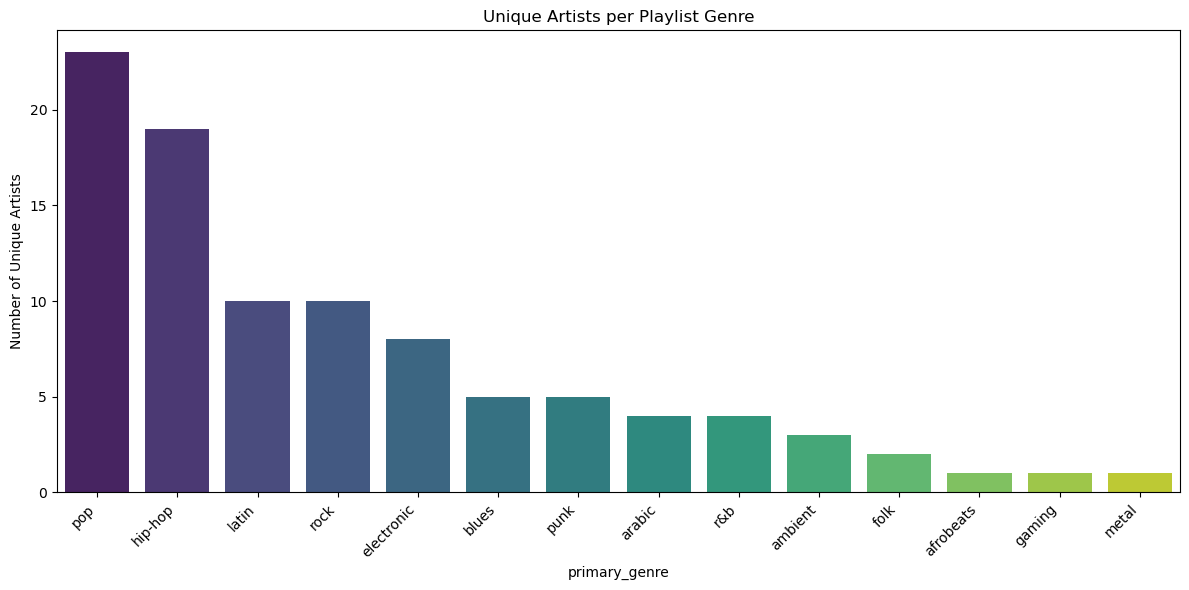

In [25]:
artist_genre_counts = musical_change_df.groupby('primary_genre')['track_artist'].nunique().sort_values(ascending=False)

# Display counts
print(artist_genre_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Unique Artists")
plt.title("Unique Artists per Playlist Genre")
plt.tight_layout()
plt.show()


This bar chart shows how many unique artists were assigned to each primary genre based on playlist appearances. 

- **Pop** and **Hip-Hop** dominate the dataset, with Pop having the highest number of unique artists (23).
- Genres like **Afrobeats**, **Metal**, and **Gaming** are underrepresented, with only one artist each.

This distribution helps us decide which genres are statistically reliable for analysis. Since some genres have too few artists, conclusions drawn from them may not be meaningful. Hence, we should focus more on genres with enough representation (Pop, Hip-Hop, Latin, Rock, etc.).

### 3. For a few sample artists from different genres, what do their key audio features look like when plotted against their album release dates? 
This is to visually validate our core premise. By plotting the trajectories of individual artists, we can get a first look on whether musical change is observable in the data.

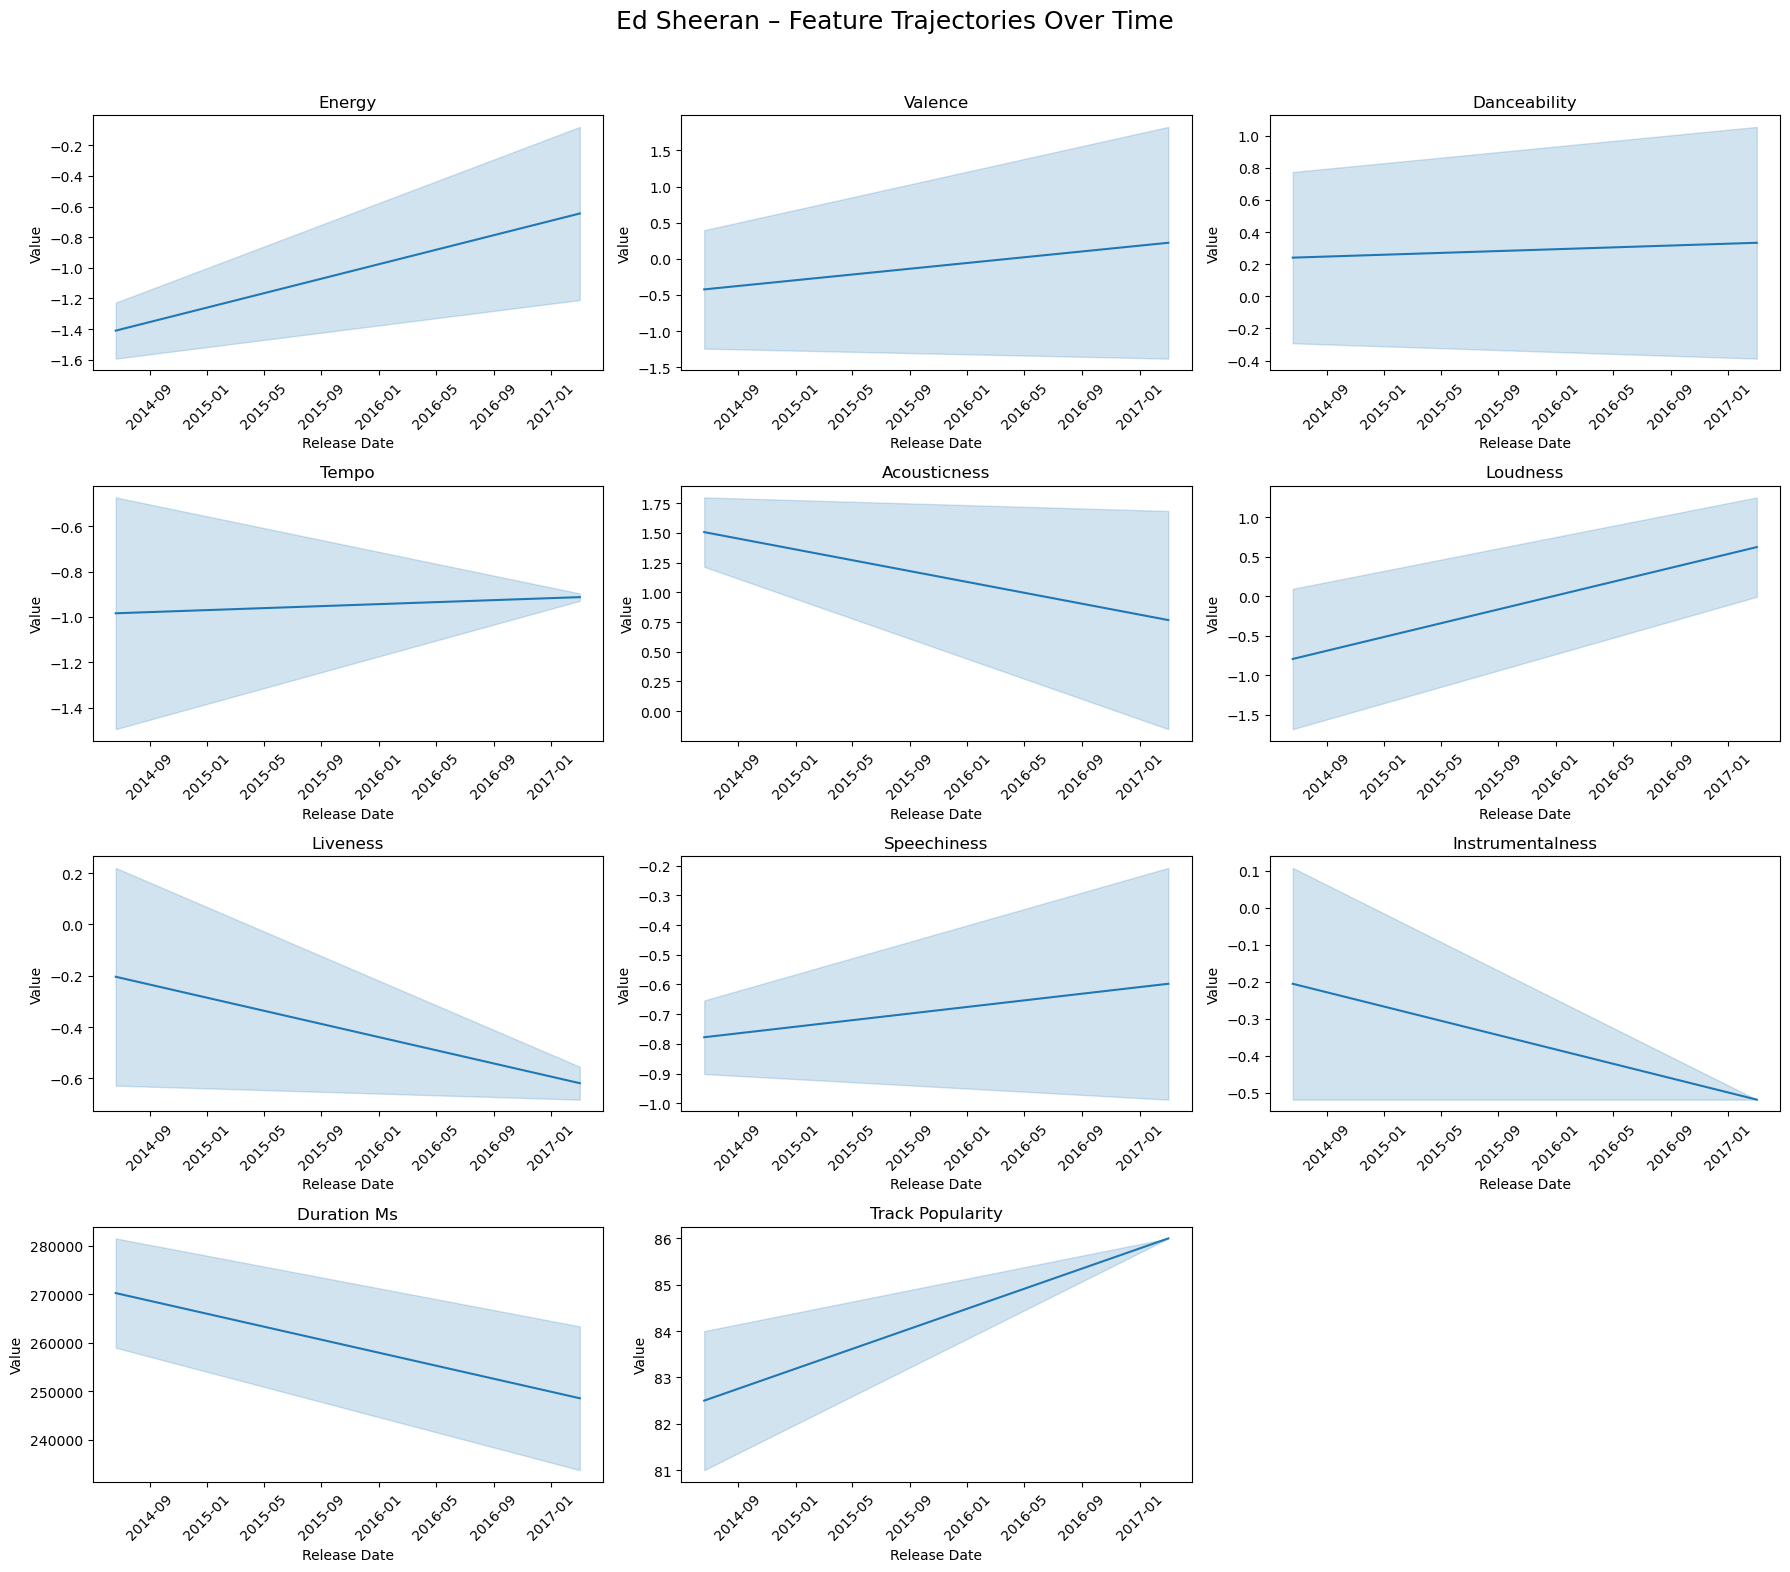

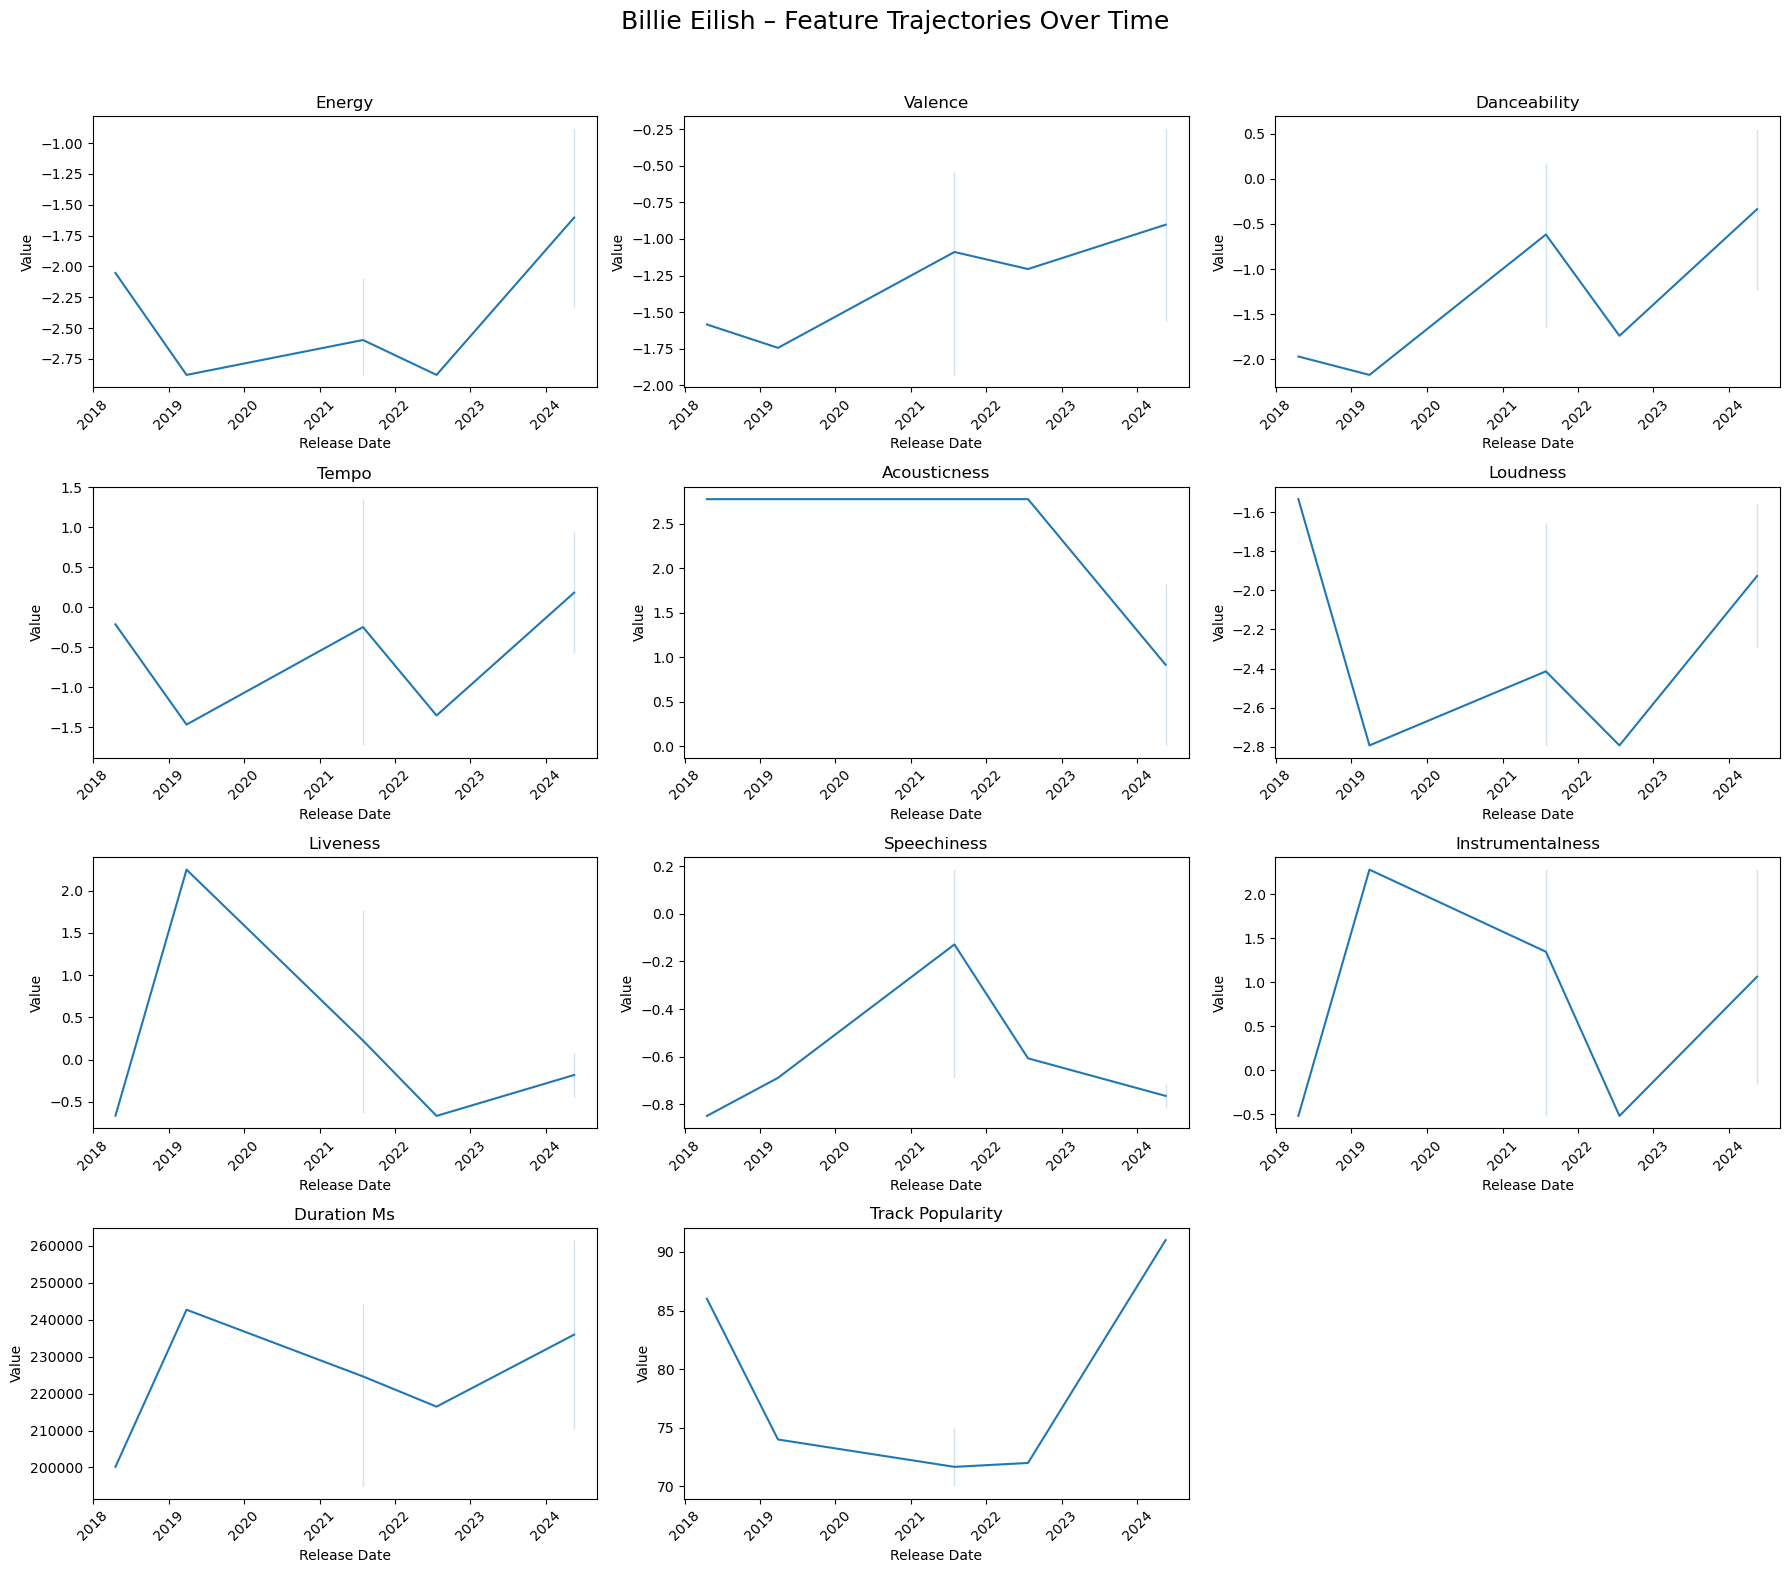

In [24]:
# Plotting feature trajectories over time for selected artists
sample_artists = ['ed sheeran', 'billie eilish']

features_to_track = [
    'energy', 'valence', 'danceability', 'tempo', 'acousticness', 'loudness',
    'liveness', 'speechiness', 'instrumentalness', 'duration_ms', 'track_popularity'
]

for artist in sample_artists:
    artist_df = high_df_final_for_analysis[high_df_final_for_analysis['track_artist'] == artist].copy()
    artist_df = artist_df.sort_values('track_album_release_date')

    if artist_df.empty:
        print(f"⚠️ No data available for {artist.title()}")
        continue

    n = len(features_to_track)
    cols = 3
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(18, rows * 4))

    for i, feature in enumerate(features_to_track, 1):
        plt.subplot(rows, cols, i)
        sns.lineplot(data=artist_df, x='track_album_release_date', y=feature)
        plt.title(feature.replace('_', ' ').title())
        plt.xlabel('Release Date')
        plt.ylabel('Value')
        plt.xticks(rotation=45)

    plt.suptitle(f'{artist.title()} – Feature Trajectories Over Time', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



### Analysis of Musical Feature Trajectories

The plots above illustrate the evolution of Ed Sheeran and Billie Eilish's musical features over their career, as represented in our dataset.

#### Ed Sheeran

* **Overall Consistency with Subtle Shifts:** Ed Sheeran generally plays safe and maintains a consistent sound, with relatively stable trends across most features.
* **Acousticness Trend:** Sheeran's recorded `acousticness` seems to show a subtly downward slope, showing more usage digital instruments over time, though still mostly with an acoustic sound.
* **Tempo Stability:** His `tempo` remains quite consistent, reinforcing his preference for more mid-tempo songs, particularly ballads.
* **Low Instrumentalness & Speechiness:** As expected for a singer-songwriter, his `instrumentalness` and `speechiness` are both at consistently low levels, showing his focus on sung vocals.
* **Energy and Loudness:** These features show some variability, particularly a subtle upward trend, showing an slight increase in high energy and louder songs.

This visual inspection confirms that while some artists may maintain a core sound, subtle shifts in features like `valence` and `energy` can hint at stylistic evolution over time, even within a seemingly consistent genre.

#### Billie Eilish

* **Pronounced Shifts in Key Features:** In contrast to Ed Sheeran, Billie Eilish has less consistency in her sound, which may show a possible playing with different styles.
    * **Energy & Danceability:** Eilish's `energy` and `danceability` varies over time, they do end up following a pattern where as one value increases, the other increases as well. There are points where she opts for higher energy songs, and points where she goes for a lower energy.
    * **Valence:** Her `valence`, just like `energy` and `danceability` follows the same pattern. Happier songs do tend to have higher energy, and the opposite applies to angrier and sadder songs, though `valence` does seem to skew towards the negatives, indicating sadder OR angrier songs.
    * **Loudness:** Similar to everything else mentioned, `loudness` also seems to follow some sort of pattern, with louder songs having higher energy, valence and danceability among other things, and vice versa for quieter songs.
* **Odd Spikes:** Features like `instrumentalness` and `speechiness` oddly spike at particular intervals, with 2019 showing a particularly higher `instrumentalness` value, and 2021-2022 showing a spike in the `speechiness` value.

Billie Eilish's trajectories serve as a strong example of an artist who visibly undergoes significant musical evolution and changes, validating our hypothesis that some artists (and potentially some genres) may exhibit more change over time. 

## GENERATIVE AI USE

During the preparation of this work the author(s) used CHATGPT for the following purposes:
- formatting
- aid in analyzing the data (picking up neat quirks of an artist that might not be obvious)
- proofreading
- aid in understanding concepts
- mental support

After using this tool/service, the author(s) reviewed and edited the content as needed and take(s) full responsibility for the content of the publication.